# Logistic Regression on Bank Customers


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## Data Read in & Exploration

In [116]:
bank = pd.read_csv('Bank.csv', sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [117]:
# View the columns
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [118]:
# View datatypes
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

The y column at the bottom is the outcome variable recording yes and no
yes = customers who bought term deposit
no = customsers who haven't bought term deposit.

I'm changing this to 0 and 1 so I can use it in modeling.

In [119]:
# Converting yes to 1 and no to 0

bank['y'] = (bank['y'] == 'yes').astype(int)

In [120]:
# Education column exploration

bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Basic category has been repeated three times with basic.4y, basic.6y and basic.9y most likely to represent the years of school. We can combine these and call them 'basic'

In [121]:
# Combining the basic groupings into one
bank['education'] = np.where(bank['education'] == 'basic.9y', 'Basic', bank['education'])
bank['education'] = np.where(bank['education'] == 'basic.6y', 'Basic', bank['education'])
bank['education'] = np.where(bank['education'] == 'basic.4y', 'Basic', bank['education'])

# Renaming University Degree column
bank['education'] = np.where(bank['education'] == 'university.degree', 'University Degree', bank['education'])

# Renaming Professional Course column
bank['education'] = np.where(bank['education'] == 'professional.course', 'Professional Course', bank['education'])

# Renaming High School column
bank['education'] = np.where(bank['education'] == 'high.school', 'High School', bank['education'])

# Capitalizing Illiterate column
bank['education'] = np.where(bank['education'] == 'illiterate', 'Illiterate', bank['education'])

# Capitalizing Unknown column
bank['education'] = np.where(bank['education'] == 'unknown', 'Unknown', bank['education'])

In [122]:
# Check the categories were changed

bank['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [123]:
# Calculating the number of people who did and didn't purchase the term deposit

bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

3,668 people bought term deposit

451 people didn't buy it

In [124]:
# I want to see the means across the Y and N groups of people.

round(bank.groupby('y').mean(numeric_only=True), 2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.90,219.41,2.61,982.76,0.14,0.24,93.60,-40.59,3.80,5175.50
1,41.89,560.79,1.98,778.72,0.59,-1.18,93.42,-39.79,2.15,5093.12


**Notes**

Average age of those who did purchase term deposit is higher then those who didn't (39 vs 42)

The pdays (days since the customer was last contacted) lower for customers who bought. The lower the pdays better the memory of the last call, therefore the better chances of the sale. (982 vs 778)

Campaign (number of calls made during the current campaign) lower for customers who bought the term deposit. (2.61 calls vs 1.98)

I want to look into marital status and education next


In [125]:
# Education means across Y and N groups

round(bank.groupby('education').mean(numeric_only=True), 2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.34,253.90,2.43,978.82,0.15,0.24,93.66,-41.12,3.78,5174.13,0.08
High School,38.10,258.53,2.63,958.02,0.21,-0.00,93.56,-41.00,3.51,5163.21,0.11
Illiterate,42.00,146.00,4.00,999.00,0.00,-2.90,92.20,-31.40,0.83,5076.20,0.00
Professional Course,40.21,278.82,2.51,958.21,0.19,0.16,93.60,-40.13,3.70,5167.60,0.12
University Degree,39.02,247.71,2.58,947.90,0.21,-0.01,93.50,-39.83,3.55,5163.02,0.13
Unknown,42.83,267.28,2.54,939.70,0.26,-0.07,93.64,-39.49,3.41,5151.26,0.16


In [126]:
# Marital Status means across Y and N groups

round(bank.groupby('marital').mean(numeric_only=True), 2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,45.11,263.16,2.54,972.26,0.17,0.14,93.60,-40.62,3.71,5170.15,0.10
married,42.39,256.29,2.53,964.16,0.17,0.17,93.60,-40.36,3.73,5170.72,0.10
single,33.21,254.65,2.56,947.34,0.23,-0.13,93.53,-40.77,3.35,5155.76,0.13
unknown,42.27,336.27,2.55,999.00,0.09,0.18,93.54,-39.69,3.86,5174.41,0.09


## Visualizations

* Histogram of education with separate bars for customers who did and didn't buy term deposit

Text(0, 0.5, 'Frequency of Purchase')

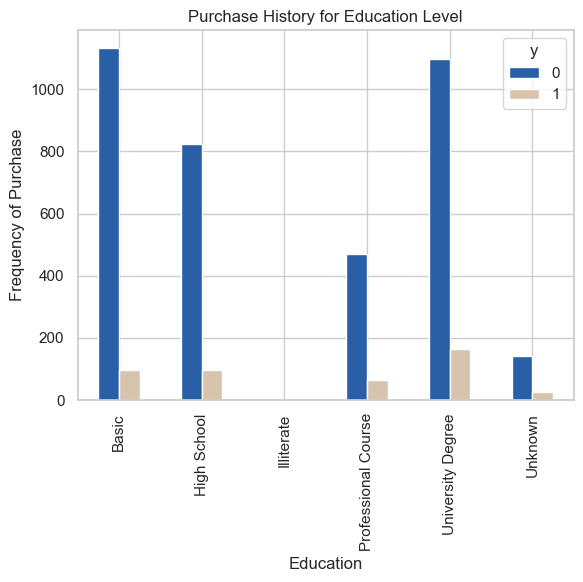

In [127]:
# Setting colors & Style
flatui = ["#295fa6", "#2a95bf", "#8ca4fc", "#827272", "#d8c4ad"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
sns.set(style='whitegrid')

# Creating Crosstab
ct = pd.crosstab(bank['education'], bank['y'])

# Plot
ct.plot(kind='bar', cmap=my_cmap)
plt.title('Purchase History for Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

This plot shows us that the frequency of purchase depends a great deal on the education level.

There is a jump from Illiterate and Unknown to Basic, High School, and Professional Course. 

Then there's another jump up to University Degree.

Meaning, education level can be a great indicator of our outcome variable.

Text(0, 0.5, 'Proportion of Customers')

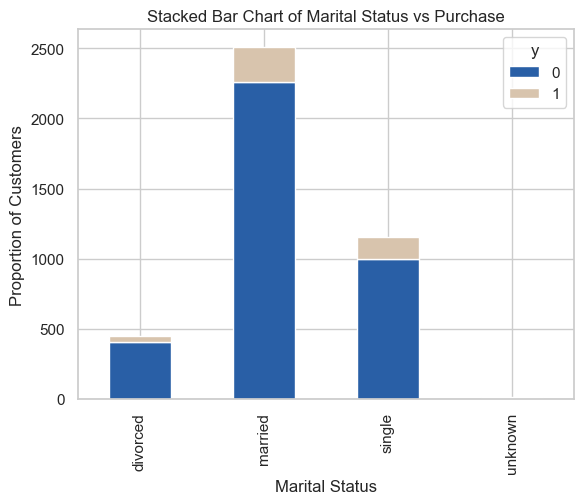

In [128]:
# Setting colors & style
flatui = ["#295fa6", "#2a95bf", "#8ca4fc", "#827272", "#d8c4ad"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
sns.set(style='whitegrid')

# Creating Crosstab
ct = pd.crosstab(bank['marital'], bank['y'])

# Plot
ct.plot(kind='bar', stacked=True, cmap=my_cmap)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

The proportion of people who did and didn't buy is nearly identical across marital status. Making marital status not a predictor of our outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

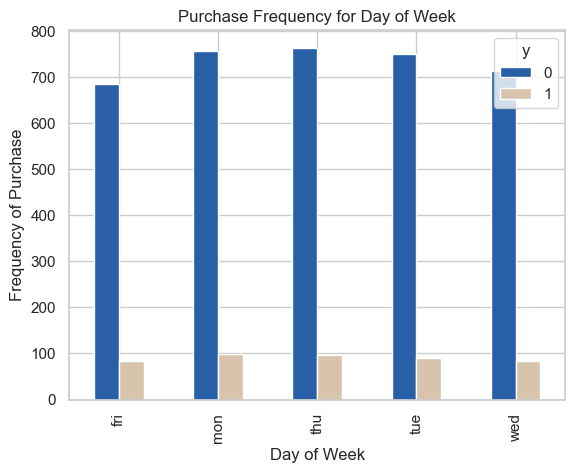

In [129]:
# Setting colors & Style
flatui = ["#295fa6", "#2a95bf", "#8ca4fc", "#827272", "#d8c4ad"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
sns.set(style='whitegrid')

# Creating Crosstab
ct = pd.crosstab(bank['day_of_week'], bank['y'])

# Plot
ct.plot(kind='bar', cmap=my_cmap)
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

In [140]:
print(bank.month.unique())

['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']


The days of the week are pretty evenly spread so this is not a great indicator. 

I'm going to check the months to see if that may be a predictor.

Text(0, 0.5, 'Frequency of Purchase')

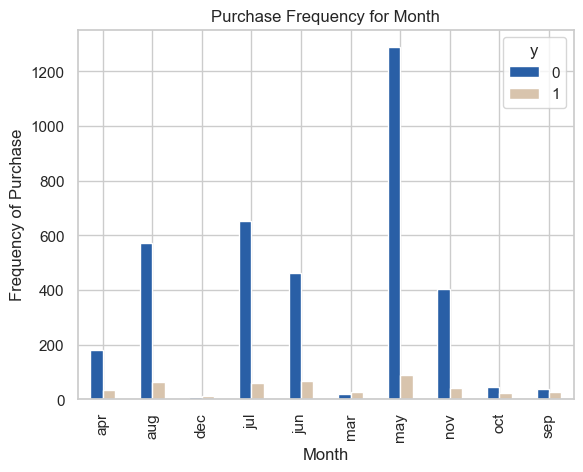

In [147]:
# Setting colors & Style
flatui = ["#295fa6", "#2a95bf", "#8ca4fc", "#827272", "#d8c4ad"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
sns.set(style='whitegrid')


# Creating Crosstab
ct = pd.crosstab(bank['month'], bank['y'])

# Plot
ct.plot(kind='bar', cmap=my_cmap)
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')